   # 'Pubs & Breweries etc' near Top 10 Software (IT) Parks in Bangalore, India.

### Section 1 - To use the learned skills in the earlier weeks and explore geographical location, leveraging Foursquare location data on my own Problem Set.

In [1]:
# Importing Libraries.

import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import requests
from geopy.geocoders import Nominatim
import folium

# Creating text output from the website which describes about the Top 10 IT Hubs.
url = 'http://www.walkthroughindia.com/walkthroughs/10-amazing-software-technological-parks-in-bengaluru/'
source_page = requests.get(url).text

# Making the text more readable/actionable using BeautifulSoup
soup_page = BeautifulSoup(source_page, 'lxml')

# Extracting the headings from the page to get the names of the IT Hubs
hubs = soup_page.find('div', class_='article_description_wrap')
hubs

# Extracting the hub names
hubs_h3 = hubs.find_all('h3')
hubs_h3

# Creating a blank list of columns the appending the column names obtained from hubs_h3 output
hubs_columns = []

for col in hubs_h3:
    column_name = col.text
    hubs_columns.append(column_name)
    
hubs_columns

['Electronic City',
 'Bagmane Tech Park',
 'Manyata Tech Park',
 'International Tech Park',
 'Prestige Tech Park',
 'RMZ Infinity',
 'Ecospace Business Park',
 'Global Village Tech Park',
 'Embassy GolfLinks Business Park',
 'Embassy TechVillage']

In [2]:
# Importing the Co-ordinates from a CSV File
columns_coordinates = ['Name of Tech Park','Longitude','Latitude']
coordinates_file = 'E:/Data Science/My_GitHub_Projects/Project-Capstone-Pubs_Near_Top_10_Bangalore_IT_Hubs/Bangalore IT Hubs coordinates.csv'
hubs_coordinates = pd.read_csv(coordinates_file,header=None)

hubs_coordinates.columns = columns_coordinates

hubs_coordinates

,Name of Tech Park,Longitude,Latitude
0,Electronic City,77.6770,12.8399
1,Bagmane Tech Park,77.6581,12.9785
2,Manyata Tech Park,77.6221,13.0448
3,International Tech Park,77.7354,12.9858
4,Prestige Tech Park,77.6889,12.9398
5,RMZ Infinity,77.6611,12.9941
6,Ecospace Business Park,77.6810,12.9275
7,Global Village Tech Park,77.5014,12.9188
8,Embassy GolfLinks Business Park,77.6465,12.9513
9,Embassy TechVillage,77.6925,12.9339


In [3]:
# Creating a List out of coordinates of the Tech Parks.
hubs_coordinates_list = hubs_coordinates[['Latitude','Longitude']].values.tolist()

# Creating a Map to understand where the IT Parks are located
bang_coordinates = [12.9716, 77.5946]
map_bangalore = folium.Map(location = bang_coordinates, zoom_start = 11)


for point in range(len(hubs_coordinates_list)):
    folium.Marker(hubs_coordinates_list[point], popup=hubs_coordinates['Name of Tech Park'][point]).add_to(map_bangalore)
    
map_bangalore

### Using FourSquare to obtain the nearby Pubs / Breweries etc within 3 km distance of these Tech Parks.

In [4]:
# Using FourSquare 

CLIENT_ID = '4CWZSQBNSL3UPE43AOKDR5LN3NVYWYHOHPIRQP1CXJ5E15MJ' 
CLIENT_SECRET = 'IAWTF2XVJZGI0ATAZ0OKJKTJPWGUEG0RENEZRQCGG0NHDYC5' 
VERSION = '20190404'
LIMIT = 100


# Function to obtain the Venue List
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Tech Park Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [5]:
# Running the above function on each venue and creating a new dataframe called hubs_venues.

hubs_venues = getNearbyVenues(names=hubs_coordinates['Name of Tech Park'],
                                   latitudes=hubs_coordinates['Latitude'],
                                   longitudes=hubs_coordinates['Longitude']
                                  )
hubs_venues

Electronic City
Bagmane Tech Park
Manyata Tech Park
International Tech Park
Prestige Tech Park
RMZ Infinity
Ecospace Business Park
Global Village Tech Park
Embassy GolfLinks Business Park
Embassy TechVillage


,Tech Park Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Electronic City,12.8399,77.6770,Golconda - Infosys Campus,12.847172,77.663378,Food Court
1,Electronic City,12.8399,77.6770,Crowne Plaza,12.850105,77.660214,Hotel
2,Electronic City,12.8399,77.6770,24@43 - Crowne Plaza Bengaluru Electronics City,12.850096,77.660302,Coffee Shop
3,Electronic City,12.8399,77.6770,Radha Regent Hotel,12.836712,77.661711,Hotel
4,Electronic City,12.8399,77.6770,The Terminus,12.850375,77.660108,Bar
5,Electronic City,12.8399,77.6770,Decathlon,12.818240,77.690913,Sporting Goods Shop
6,Electronic City,12.8399,77.6770,Subway,12.850239,77.667418,Sandwich Place
7,Electronic City,12.8399,77.6770,E Inn Bangalore,12.824801,77.681438,Hotel
8,Electronic City,12.8399,77.6770,Cafe Coffee Day,12.833860,77.679843,Café
9,Electronic City,12.8399,77.6770,CCD,12.837689,77.659706,Café


In [6]:
# Filtering the output further to obtain the required data
v_cat = hubs_venues['Venue Category']

hubs_pubs_brews = hubs_venues[(v_cat == 'Pub') | (v_cat == 'Brewery') | (v_cat == 'Nightclub') | (v_cat == 'Cocktail Bar') | \
                              (v_cat == 'Irish Pub') | (v_cat == 'Lounge') | (v_cat == 'Bar')].reset_index(drop=True)

hubs_pubs_brews.head(15)

,Tech Park Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Electronic City,12.8399,77.6770,The Terminus,12.850375,77.660108,Bar
1,Bagmane Tech Park,12.9785,77.6581,Toit Brewpub,12.979367,77.640702,Brewery
2,Bagmane Tech Park,12.9785,77.6581,Monkey Bar,12.970399,77.645271,Pub
3,Bagmane Tech Park,12.9785,77.6581,eclipse lounge,12.973695,77.644001,Lounge
4,Bagmane Tech Park,12.9785,77.6581,3 dots and a dash,12.980654,77.640836,Cocktail Bar
5,Bagmane Tech Park,12.9785,77.6581,The Black Rabbit,12.969891,77.641251,Pub
6,Bagmane Tech Park,12.9785,77.6581,Big Pitcher,12.960101,77.646946,Brewery
7,Bagmane Tech Park,12.9785,77.6581,Puma Social Club,12.967254,77.641212,Nightclub
8,Bagmane Tech Park,12.9785,77.6581,Library Bar,12.961288,77.648629,Bar
9,Bagmane Tech Park,12.9785,77.6581,Doff Pub,12.977382,77.640817,Pub


In [7]:
# Checking the Count of Number of Pubs / Bars / Breweries / NightClubs etc within 3km Radius of the IT Parks.
pubs_brew_count = pd.DataFrame((hubs_pubs_brews.groupby('Tech Park Name').count())['Venue']).reset_index().rename(columns= {'Venue':'Number of Pubs / Breweries etc within 3km'})
pubs_brew_count

,Tech Park Name,Number of Pubs / Breweries etc within 3km
0,Bagmane Tech Park,13
1,Ecospace Business Park,7
2,Electronic City,1
3,Embassy GolfLinks Business Park,15
4,Embassy TechVillage,8
5,Global Village Tech Park,1
6,International Tech Park,3
7,Manyata Tech Park,2
8,Prestige Tech Park,6
9,RMZ Infinity,4


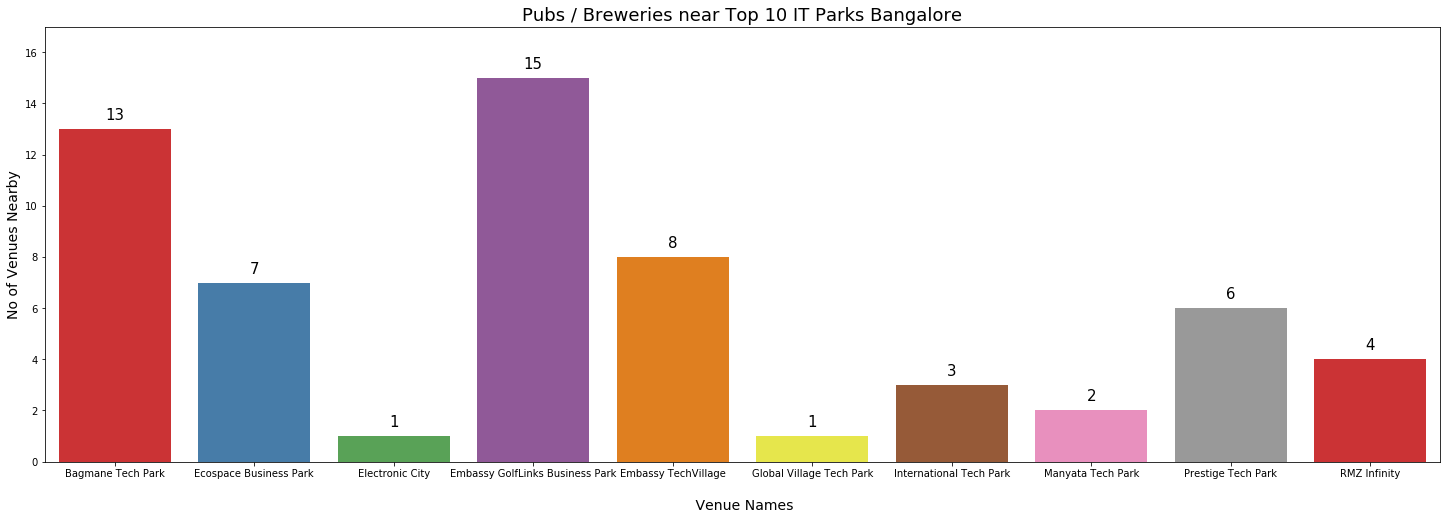

In [8]:
plt.figure(figsize = (25,8))
plot = sns.barplot(x = 'Tech Park Name', y = 'Number of Pubs / Breweries etc within 3km', data = pubs_brew_count, palette = 'Set1')
ax=plot
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=15, color='black',xytext = (0,14), textcoords='offset points')

_ = plot.set_ylim(0,17) #To make space for the annotations so that it can show till 17

plt.title('Pubs / Breweries near Top 10 IT Parks Bangalore', fontsize = 18)
plt.xlabel('\n Venue Names', fontsize = 14)
plt.ylabel('No of Venues Nearby',fontsize = 14)
plt.show()

In [9]:
# Adding Pubs to the Map
for lat, lng, name in zip(hubs_pubs_brews['Venue Latitude'],hubs_pubs_brews['Venue Longitude'],hubs_pubs_brews['Venue']):
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangalore)

map_bangalore

### ------------- Section 1 Concluded. -------------

## Section 2

### Practicing Machine Learning. Consider that we have a set of data (List of 'All Venues' from above) and we need to Cluster them in groups.

### Assumption: Lets assume we have a list of Venues (Venue Coordinates) and we are not sure where they are located or which venues are located Nearby.
### We will attempt to use K Means Clustering to cluster these Venues together in Groups and attempt to figure out the best k value or the number of clusters it can be divided into.

In [10]:
hubs_venues = hubs_venues[['Venue','Venue Latitude','Venue Longitude']]
hubs_venues.head()

,Venue,Venue Latitude,Venue Longitude
0,Golconda - Infosys Campus,12.847172,77.663378
1,Crowne Plaza,12.850105,77.660214
2,24@43 - Crowne Plaza Bengaluru Electronics City,12.850096,77.660302
3,Radha Regent Hotel,12.836712,77.661711
4,The Terminus,12.850375,77.660108


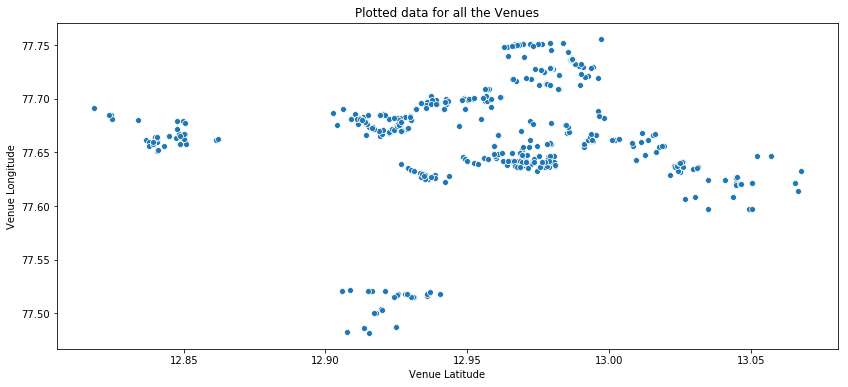

In [11]:
# plotting to see how the data looks

plt.figure(figsize =(14,6))
plot1 = sns.scatterplot(x = 'Venue Latitude', y = 'Venue Longitude', data = hubs_venues)
plt.title('Plotted data for all the Venues')
plt.xlabel('Venue Latitude')
plt.ylabel('Venue Longitude')
plt.show()

In [12]:
# Attempting K Means Clustering

X = hubs_venues[['Venue Latitude','Venue Longitude']].values
X

array([[12.84717234, 77.66337798],
       [12.85010524, 77.660214  ],
       [12.85009618, 77.66030198],
       ...,
       [12.92599356, 77.6753643 ],
       [12.91296954, 77.67969725],
       [12.92646291, 77.67824516]])

In [13]:
# Performing PreProcessing on X
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

X

array([[-2.5061625 , -0.00397602],
       [-2.43620946, -0.07273311],
       [-2.43642562, -0.07082127],
       ...,
       [-0.62619157,  0.25650188],
       [-0.93682847,  0.35066224],
       [-0.61499724,  0.31910649]])

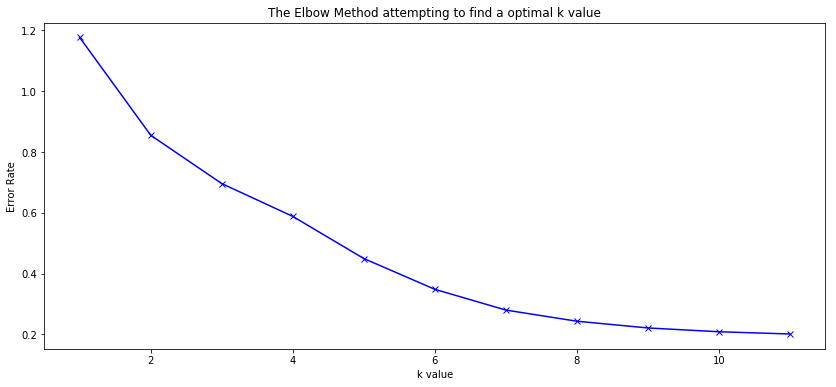

In [14]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# Attempting to determine k values
error_rate = []
K = range(1,12)
for k in K:
    kmeansModel = KMeans(n_clusters=k).fit(X)
    kmeansModel.fit(X)
    error_rate.append(sum(np.min(cdist(X, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.figure(figsize = (14,6))
plt.plot(K, error_rate, 'bx-')
plt.xlabel('k value')
plt.ylabel('Error Rate')
plt.title('The Elbow Method attempting to find a optimal k value')
plt.show()

### Checking the above output, seems k = 7 could be an acceptable value for k. Attempting to cluster the data and comparing it with the above scatter plot of the Venues.

In [15]:
# Training/Fitting the Model. Trying with K = 7.

kmeans = KMeans(n_clusters=7).fit(X)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
labels = kmeans.labels_

hubs_venues_df = hubs_venues.copy()
hubs_venues_df['Cluster'] = labels

hubs_venues_df.head(10)

,Venue,Venue Latitude,Venue Longitude,Cluster
0,Golconda - Infosys Campus,12.847172,77.663378,2
1,Crowne Plaza,12.850105,77.660214,2
2,24@43 - Crowne Plaza Bengaluru Electronics City,12.850096,77.660302,2
3,Radha Regent Hotel,12.836712,77.661711,2
4,The Terminus,12.850375,77.660108,2
5,Decathlon,12.818240,77.690913,2
6,Subway,12.850239,77.667418,2
7,E Inn Bangalore,12.824801,77.681438,2
8,Cafe Coffee Day,12.833860,77.679843,2
9,CCD,12.837689,77.659706,2


In [17]:
# Checking the Centroid value by averaging the features in each Cluster.

centroid_df = hubs_venues_df.groupby('Cluster').mean()
centroid_df

,Venue Latitude,Venue Longitude
Cluster,,
0,12.971687,77.646451
1,12.945949,77.697068
2,12.842963,77.664922
3,12.924391,77.511871
4,13.031610,77.633669
5,12.979890,77.732294
6,12.922449,77.675538


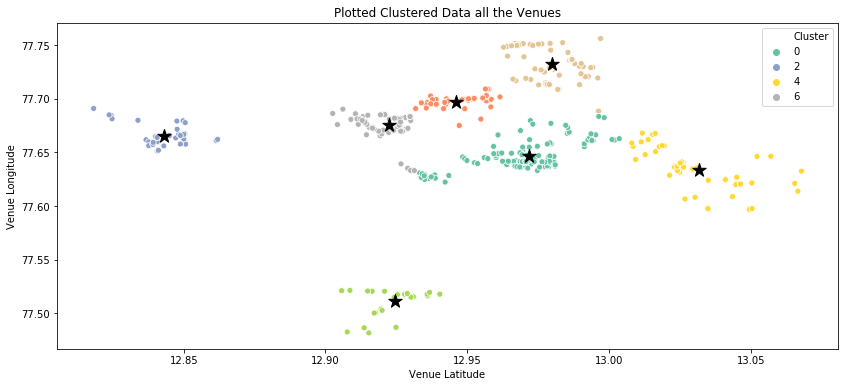

In [18]:
# Plotting the Clustered Data

plt.figure(figsize =(14,6))
plot2 = sns.scatterplot(x = 'Venue Latitude', y = 'Venue Longitude', data = hubs_venues_df, hue = 'Cluster', palette = 'Set2')
plt.scatter(x = 'Venue Latitude', y = 'Venue Longitude', data = centroid_df, s=200, marker = '*', c = 'black')
plt.title('Plotted Clustered Data all the Venues')
plt.xlabel('Venue Latitude')
plt.ylabel('Venue Longitude')
plt.show()


### Cluster 1

In [19]:
Cluster_1 = hubs_venues_df[hubs_venues_df['Cluster'] == 0]
Cluster_1.head(3)

,Venue,Venue Latitude,Venue Longitude,Cluster
46,Café Max,12.978408,77.644271,0
47,Milano,12.979096,77.644063,0
48,Third Wave Coffee Roasters Indiranagar,12.978554,77.645324,0


### Cluster 2

In [20]:
Cluster_2 = hubs_venues_df[hubs_venues_df['Cluster'] == 1]
Cluster_2.head(3)

,Venue,Venue Latitude,Venue Longitude,Cluster
280,Cisco Gym,12.935884,77.696422,1
281,ZELA,12.942457,77.694914,1
282,The Black Pearl,12.939236,77.694729,1


### Cluster 3

In [21]:
Cluster_3 = hubs_venues_df[hubs_venues_df['Cluster'] == 2]
Cluster_3.head(3)

,Venue,Venue Latitude,Venue Longitude,Cluster
0,Golconda - Infosys Campus,12.847172,77.663378,2
1,Crowne Plaza,12.850105,77.660214,2
2,24@43 - Crowne Plaza Bengaluru Electronics City,12.850096,77.660302,2


### Cluster 4

In [22]:
Cluster_4 = hubs_venues_df[hubs_venues_df['Cluster'] == 3]
Cluster_4.head(3)

,Venue,Venue Latitude,Venue Longitude,Cluster
562,Kaapi Katte,12.916458,77.520567,3
563,Davanagere Benne Dosa,12.908632,77.521354,3
564,Royal Andhra Spice,12.905776,77.521034,3


### Cluster 5

In [23]:
Cluster_5 = hubs_venues_df[hubs_venues_df['Cluster'] == 4]
Cluster_5.head(3)

,Venue,Venue Latitude,Venue Longitude,Cluster
146,Adyar Ananda Bhavan,13.041035,77.624513,4
147,Aaha Andhra,13.050363,77.621421,4
148,Barista Lavazza,13.050445,77.621710,4


### Cluster 6

In [24]:
Cluster_6 = hubs_venues_df[hubs_venues_df['Cluster'] == 5]
Cluster_6.head(3)

,Venue,Venue Latitude,Venue Longitude,Cluster
194,Barbeque Nation,12.987283,77.736093,5
195,Latitude,12.986769,77.737480,5
196,Windmills Craftworks,12.982460,77.721861,5


### Cluster 7

In [25]:
Cluster_7 = hubs_venues_df[hubs_venues_df['Cluster'] == 6]
Cluster_7.head(3)

,Venue,Venue Latitude,Venue Longitude,Cluster
289,Novotel Bengaluru Techpark,12.929699,77.683294,6
290,Starbucks Coffee,12.922508,77.680960,6
291,Madhuloka,12.922247,77.668428,6


### Data arranged in Clusters.
### Conclusion: We notice that within 3km Radius of these 10 IT Parks in Bangalore, 'Embassy GolfLinks Business Park' has most options available to hang out with friends post work (for grabing a beer etc) while 'Global Village Tech Park' & 'Electronic City' has least no of options available within the 3km Radius.
### ------------- Section 2 Concluded. -------------
## Project Concluded.